In [1]:
%%html
<style> table { display: inline-block } </style>

# CAB420 Assigment 2 - Model 3

| Name   | Student Number |
| :---   | :--- |
| Charmi Raval       | N10510702          |
| Leonardo Villamil  | N10411526          |
| Litian Chen        | N9646922           |
| Tace Stewart       | N9654411           |

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras

from tensorflow import keras
from sklearn.utils import class_weight
from sklearn import preprocessing
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, SpatialDropout2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Load Data

In [15]:
# Load data
train = pd.read_csv ('Data/training.csv')
validation = pd.read_csv ('Data/validation.csv')
test = pd.read_csv ('Data/testing.csv')

In [16]:
# Split path, features and label

X_train = train.drop(['filename', 'accent'], axis=1)
path_train = train['filename'].to_numpy()
y_train = train['accent'].to_numpy()

X_val = validation.drop(['filename', 'accent'], axis=1)
path_val = validation['filename'].to_numpy()
y_val = validation['accent'].to_numpy()

X_test = test.drop(['filename', 'accent'], axis=1)
path_test = test['filename'].to_numpy()
y_test = test['accent'].to_numpy()

In [17]:
unique_train = np.unique(y_train)
unique_val = np.unique(y_val)
unique_test = np.unique(y_test)

In [18]:
# Get the label and tranform
labels = np.unique(y_train)

encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

In [19]:
# Calculation of class weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

for i in range(17):
    print('%s - class %s - weight %s\n' %(labels[i], (str(np.unique(y_train)[i])), str(class_weights[i])))

african - class 0 - weight 3.7325975166185876

australia - class 1 - weight 0.9309988842195273

bermuda - class 2 - weight 29.67098703888335

canada - class 3 - weight 1.010343344725347

england - class 4 - weight 0.31900411260902345

hongkong - class 5 - weight 13.43162328870167

indian - class 6 - weight 0.7413558308698973

ireland - class 7 - weight 5.088919288645691

malaysia - class 8 - weight 15.962810656177364

newzealand - class 9 - weight 4.769995191537105

other - class 10 - weight 1.1126620139581256

philippines - class 11 - weight 12.156862745098039

scotland - class 12 - weight 4.539122476994255

singapore - class 13 - weight 35.48489666136725

southatlandtic - class 14 - weight 71.941982272361

us - class 15 - weight 0.12046160758497954

wales - class 16 - weight 15.914438502673796

E:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16], y=[15  4 15 ... 15  3  6] as keyword

In [20]:
# To One-hot encode
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [21]:
def eval_model(prediction, y_test, labels, history):
    y_test = np.argmax(y_test, axis=1)
    
    print('Classification Report\n')
    print(classification_report(y_test, prediction))

    print('Confusion Matrix')
    cm = confusion_matrix(y_test, prediction, normalize='true')
    fig = plt.figure(figsize=[20, 20])
    ax = fig.add_subplot(1, 1, 1)
    c = ConfusionMatrixDisplay(cm, display_labels=labels)
    c.plot(ax = ax)

    fig = plt.figure(figsize=[12, 4])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.legend()

    fig = plt.figure(figsize=[12, 4])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['precision'], label="Training Precision")
    ax.plot(history.history['val_precision'], label="Validation Precision")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['recall'], label="Training Recall")
    ax.plot(history.history['val_recall'], label="Validation Recall")
    ax.legend()

## Test Model (no class weights apply)

In [10]:
# Define the keras model
test_model = keras.models.Sequential()
test_model.add(Dense(64, input_dim=45, activation='relu'))
test_model.add(Dense(128, activation='relu'))
test_model.add(Dense(256, activation='relu'))
test_model.add(Dense(128, activation='relu'))
test_model.add(Dense(64, activation='relu'))
test_model.add(Dense(17, activation='softmax', name='output'))

print(test_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2944      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 17)                1105      
Total params: 86,545
Trainable params: 86,545
Non-trainable params: 0
____________________________________________________

In [11]:
test_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

print(test_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2944      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 17)                1105      
Total params: 86,545
Trainable params: 86,545
Non-trainable params: 0
____________________________________________________

In [26]:
history = test_model.fit(X_train, y_train, epochs=80, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/80
175/175 [==============================] - 1s 4ms/step - loss: 1.2531 - accuracy: 0.5943 - precision: 0.6856 - recall: 0.4471 - val_loss: 1.3241 - val_accuracy: 0.5770 - val_precision: 0.6738 - val_recall: 0.4146
Epoch 2/80
175/175 [==============================] - 1s 3ms/step - loss: 1.2394 - accuracy: 0.5998 - precision: 0.6891 - recall: 0.4559 - val_loss: 1.2960 - val_accuracy: 0.5864 - val_precision: 0.6841 - val_recall: 0.4355
Epoch 3/80
175/175 [==============================] - 1s 3ms/step - loss: 1.2227 - accuracy: 0.6038 - precision: 0.6973 - recall: 0.4625 - val_loss: 1.3016 - val_accuracy: 0.5848 - val_precision: 0.7158 - val_recall: 0.3744
Epoch 4/80
175/175 [==============================] - 1s 3ms/step - loss: 1.2075 - accuracy: 0.6096 - precision: 0.7004 - recall: 0.4714 - val_loss: 1.2903 - val_accuracy: 0.5907 - val_precision: 0.7046 - val_recall: 0.4043
Epoch 5/80
175/175 [==============================] - 1s 3ms/step - loss: 1.1986 - accuracy: 0.6119 - pr

930/930 [==============================] - 1s 548us/step - loss: 1.1709 - accuracy: 0.6729 - precision: 0.7206 - recall: 0.6247
Classification Report

              precision    recall  f1-score   support

           0       0.56      0.43      0.49       465
           1       0.63      0.57      0.60      1817
           2       0.39      0.28      0.33        53
           3       0.54      0.43      0.48      1682
           4       0.65      0.57      0.61      5455
           5       0.52      0.57      0.54       133
           6       0.58      0.53      0.55      2323
           7       0.61      0.36      0.45       357
           8       0.68      0.37      0.48        97
           9       0.71      0.43      0.54       384
          10       0.72      0.53      0.61      1632
          11       0.47      0.17      0.25       135
          12       0.68      0.38      0.48       386
          13       0.54      0.33      0.41        67
          14       0.28      0.29     

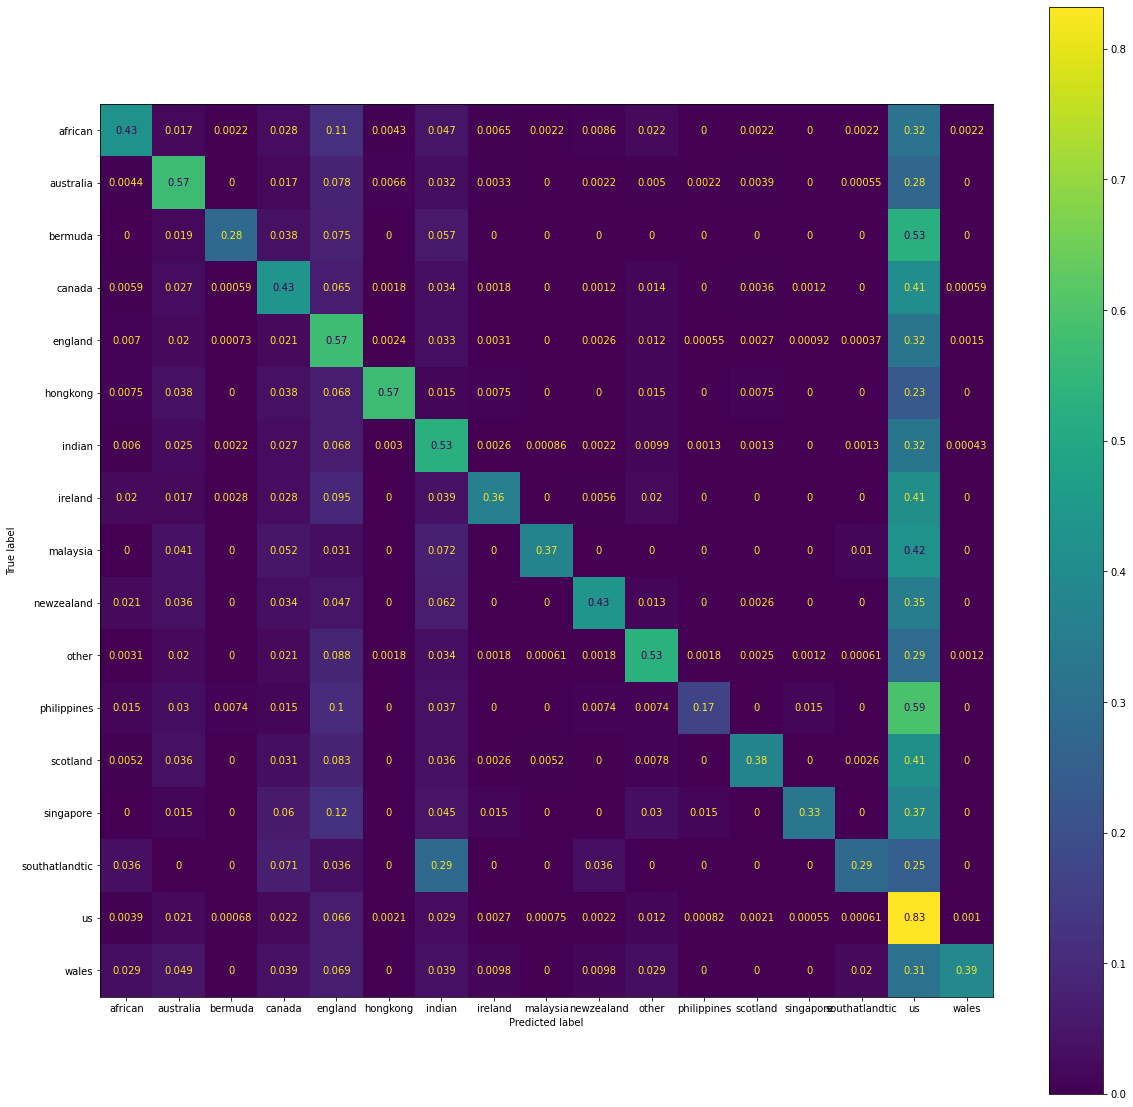

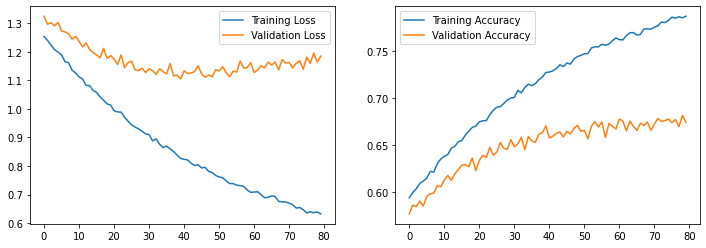

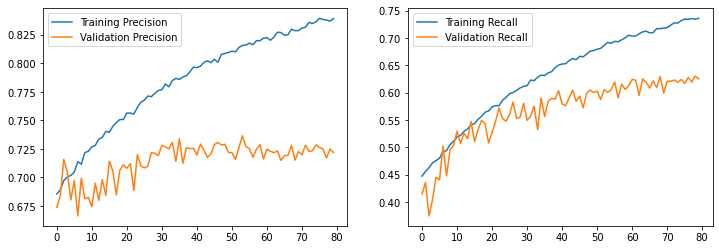

In [27]:
test_scores = test_model.evaluate(X_test, y_test)

prediction = test_model.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)

## First ANN Model (class weights apply)

In [14]:
# Define the keras model
ann_model1 = keras.models.Sequential()
ann_model1.add(Dense(64, input_dim=45, activation='relu'))
ann_model1.add(Dense(128, activation='relu'))
ann_model1.add(Dense(256, activation='relu'))
ann_model1.add(Dense(128, activation='relu'))
ann_model1.add(Dense(64, activation='relu'))
ann_model1.add(Dense(17, activation='softmax', name='output'))

print(ann_model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                2944      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 17)                1105      
Total params: 86,545
Trainable params: 86,545
Non-trainable params: 0
__________________________________________________

In [15]:
ann_model1.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   loss_weights=class_weights,
                   metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

print(ann_model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                2944      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 17)                1105      
Total params: 86,545
Trainable params: 86,545
Non-trainable params: 0
__________________________________________________

In [28]:
history = ann_model1.fit(X_train, y_train, epochs=80, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/80
175/175 [==============================] - 1s 3ms/step - loss: 15.8309 - accuracy: 0.6052 - precision: 0.6954 - recall: 0.4684 - val_loss: 16.8723 - val_accuracy: 0.5858 - val_precision: 0.6507 - val_recall: 0.4748
Epoch 2/80
175/175 [==============================] - 1s 3ms/step - loss: 15.5913 - accuracy: 0.6112 - precision: 0.7015 - recall: 0.4764 - val_loss: 16.7699 - val_accuracy: 0.5895 - val_precision: 0.6500 - val_recall: 0.4935
Epoch 3/80
175/175 [==============================] - 0s 3ms/step - loss: 15.4609 - accuracy: 0.6140 - precision: 0.7026 - recall: 0.4783 - val_loss: 16.4851 - val_accuracy: 0.5959 - val_precision: 0.6834 - val_recall: 0.4509
Epoch 4/80
175/175 [==============================] - 0s 3ms/step - loss: 15.2989 - accuracy: 0.6164 - precision: 0.7042 - recall: 0.4857 - val_loss: 16.4444 - val_accuracy: 0.5959 - val_precision: 0.6960 - val_recall: 0.4341
Epoch 5/80
175/175 [==============================] - 0s 3ms/step - loss: 15.0656 - accuracy: 0.

930/930 [==============================] - 1s 529us/step - loss: 15.4482 - accuracy: 0.6800 - precision: 0.7233 - recall: 0.6375
Classification Report

              precision    recall  f1-score   support

           0       0.48      0.48      0.48       465
           1       0.72      0.51      0.60      1817
           2       0.37      0.21      0.27        53
           3       0.49      0.49      0.49      1682
           4       0.66      0.61      0.63      5455
           5       0.90      0.53      0.66       133
           6       0.60      0.53      0.56      2323
           7       0.59      0.44      0.50       357
           8       0.77      0.34      0.47        97
           9       0.76      0.40      0.52       384
          10       0.79      0.48      0.60      1632
          11       0.39      0.21      0.28       135
          12       0.60      0.46      0.52       386
          13       0.67      0.18      0.28        67
          14       0.46      0.21    

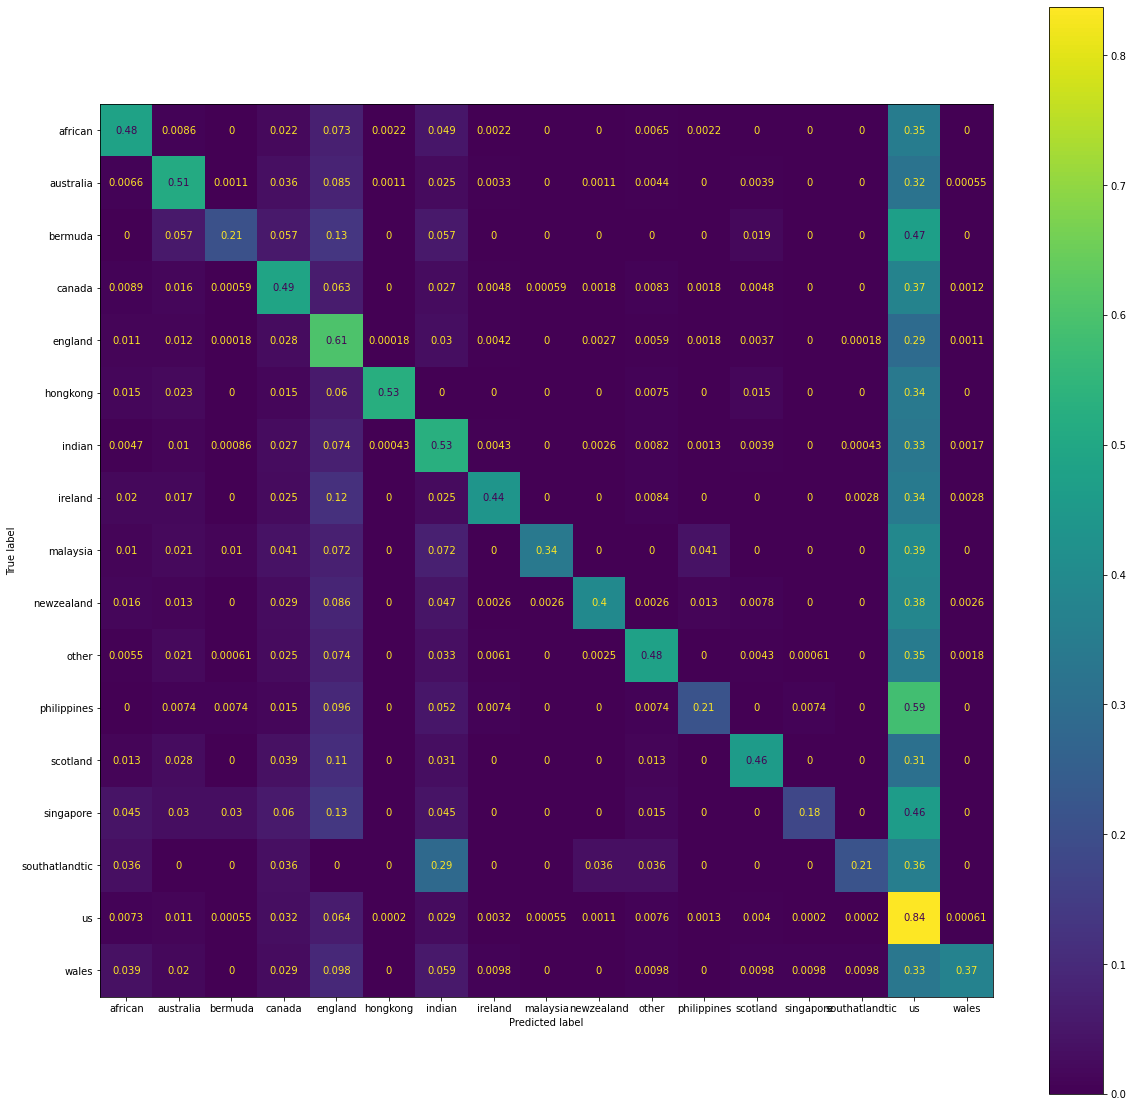

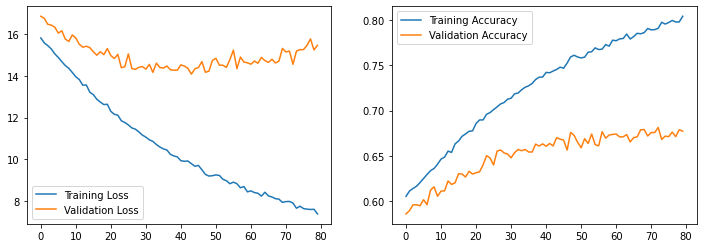

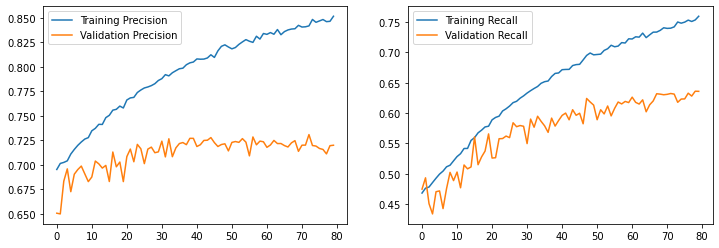

In [29]:
test_scores = ann_model1.evaluate(X_test, y_test)

prediction = ann_model1.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)

## Second ANN Model (class weights apply with more complex model)

In [22]:
# Define the keras model
ann_model2 = keras.models.Sequential()
ann_model2.add(Dense(64, input_dim=45, activation='relu'))
ann_model2.add(Dense(128, activation='relu'))
ann_model2.add(Dense(256, activation='relu'))
ann_model2.add(Dense(512, activation='relu'))
ann_model2.add(Dense(1024, activation='relu'))
ann_model2.add(Dense(2048, activation='relu'))
ann_model2.add(Dense(1024, activation='relu'))
ann_model2.add(Dense(256, activation='relu'))
ann_model2.add(Dense(128, activation='relu'))
ann_model2.add(Dense(64, activation='relu'))
ann_model2.add(Dense(32, activation='relu'))
ann_model2.add(Dense(17, activation='softmax', name='output'))

print(ann_model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                2944      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_15 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_17 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
dense_18 (Dense)             (None, 1024)             

In [23]:
ann_model2.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   loss_weights=class_weights,
                   metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

In [24]:
history = ann_model2.fit(X_train, y_train, epochs=80, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/80
175/175 [==============================] - 16s 85ms/step - loss: 112.3016 - accuracy: 0.3961 - precision: 0.4060 - recall: 0.1829 - val_loss: 21.7096 - val_accuracy: 0.4880 - val_precision: 0.5084 - val_recall: 0.3939
Epoch 2/80
175/175 [==============================] - 15s 83ms/step - loss: 21.6639 - accuracy: 0.4892 - precision: 0.5372 - recall: 0.2298 - val_loss: 21.5205 - val_accuracy: 0.4889 - val_precision: 0.6277 - val_recall: 0.0435
Epoch 3/80
175/175 [==============================] - 14s 81ms/step - loss: 21.2485 - accuracy: 0.4917 - precision: 0.5571 - recall: 0.2400 - val_loss: 21.1254 - val_accuracy: 0.4897 - val_precision: 0.6228 - val_recall: 0.1218
Epoch 4/80
175/175 [==============================] - 14s 82ms/step - loss: 20.9457 - accuracy: 0.4943 - precision: 0.5715 - recall: 0.2542 - val_loss: 20.9034 - val_accuracy: 0.4915 - val_precision: 0.5756 - val_recall: 0.2586
Epoch 5/80
175/175 [==============================] - 16s 89ms/step - loss: 20.6796 - a

930/930 [==============================] - 5s 5ms/step - loss: 26.6802 - accuracy: 0.6472 - precision: 0.6588 - recall: 0.6390
Classification Report

              precision    recall  f1-score   support

           0       0.46      0.43      0.45       465
           1       0.62      0.48      0.54      1817
           2       0.31      0.17      0.22        53
           3       0.51      0.39      0.44      1682
           4       0.61      0.57      0.59      5455
           5       0.65      0.53      0.58       133
           6       0.55      0.51      0.53      2323
           7       0.54      0.41      0.47       357
           8       0.69      0.37      0.48        97
           9       0.51      0.39      0.44       384
          10       0.64      0.52      0.57      1632
          11       0.35      0.23      0.28       135
          12       0.57      0.39      0.46       386
          13       0.62      0.27      0.38        67
          14       0.17      0.07      

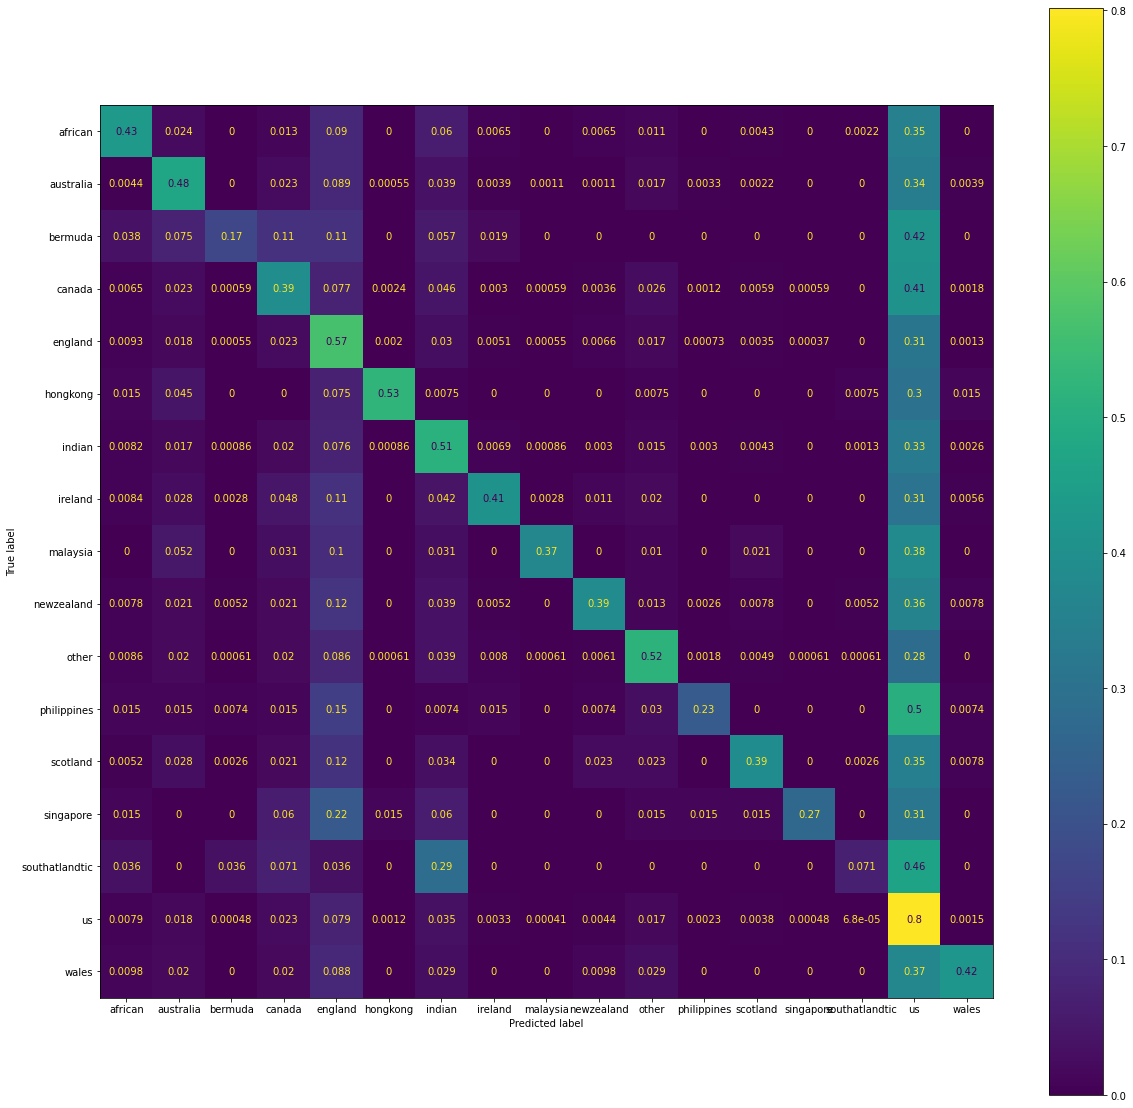

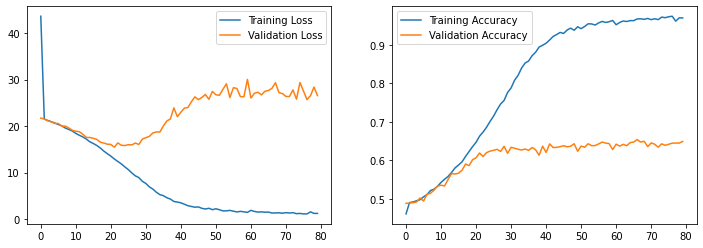

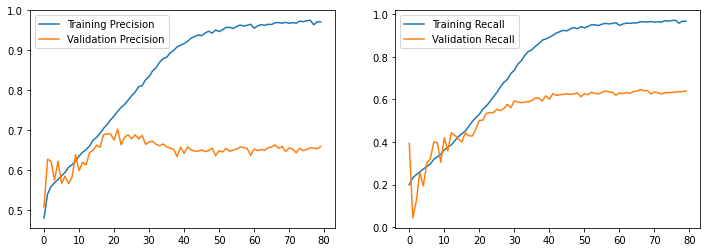

In [25]:
test_scores = ann_model2.evaluate(X_test, y_test)

prediction = ann_model2.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)

## Third ANN Model (complex model with bp)

In [60]:
# Define the keras model
ann_model3 = keras.models.Sequential()
ann_model3.add(Dense(64, input_dim=45, activation='relu'))
ann_model3.add(Dense(128, activation='relu'))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(256, activation='relu'))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(512, activation='relu'))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(1024, activation='relu'))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(512, activation='relu'))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(256, activation='relu'))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(128, activation='relu'))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(64, activation='relu'))
ann_model3.add(BatchNormalization())
ann_model3.add(Activation('relu'))
ann_model3.add(Dropout(0.2))
ann_model3.add(Dense(32, activation='relu'))
ann_model3.add(Dense(17, activation='softmax', name='output'))

print(ann_model3.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_130 (Dense)            (None, 64)                2944      
_________________________________________________________________
dense_131 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_132 (Dense)            (None, 256)               33024     
_________________________________________________________________
batch_normalization_27 (Batc (None, 256)               1024      
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 512)             

In [61]:
ann_model3.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   loss_weights=class_weights,
                   metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

In [63]:
history = ann_model3.fit(X_train, y_train, epochs=160, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/160
175/175 [==============================] - 6s 34ms/step - loss: 10.9926 - accuracy: 0.7142 - precision: 0.7862 - recall: 0.6331 - val_loss: 17.0474 - val_accuracy: 0.5862 - val_precision: 0.6492 - val_recall: 0.5006
Epoch 2/160
175/175 [==============================] - 6s 34ms/step - loss: 10.8243 - accuracy: 0.7180 - precision: 0.7895 - recall: 0.6354 - val_loss: 14.4577 - val_accuracy: 0.6460 - val_precision: 0.7007 - val_recall: 0.5814
Epoch 3/160
175/175 [==============================] - 6s 34ms/step - loss: 9.8468 - accuracy: 0.7421 - precision: 0.8077 - recall: 0.6718 - val_loss: 16.4346 - val_accuracy: 0.6227 - val_precision: 0.6605 - val_recall: 0.5746
Epoch 4/160
175/175 [==============================] - 6s 34ms/step - loss: 9.4612 - accuracy: 0.7507 - precision: 0.8127 - recall: 0.6847 - val_loss: 17.0118 - val_accuracy: 0.5845 - val_precision: 0.6540 - val_recall: 0.4913
Epoch 5/160
175/175 [==============================] - 6s 33ms/step - loss: 9.1193 - accur

930/930 [==============================] - 2s 2ms/step - loss: 12.1858 - accuracy: 0.7723 - precision: 0.7852 - recall: 0.7643
Classification Report

              precision    recall  f1-score   support

           0       0.81      0.64      0.71       465
           1       0.76      0.71      0.73      1817
           2       0.66      0.51      0.57        53
           3       0.75      0.60      0.67      1682
           4       0.73      0.73      0.73      5455
           5       0.84      0.67      0.74       133
           6       0.76      0.65      0.70      2323
           7       0.82      0.58      0.68       357
           8       0.75      0.65      0.70        97
           9       0.72      0.66      0.69       384
          10       0.77      0.67      0.72      1632
          11       0.71      0.52      0.60       135
          12       0.78      0.65      0.71       386
          13       0.81      0.58      0.68        67
          14       0.33      0.36      

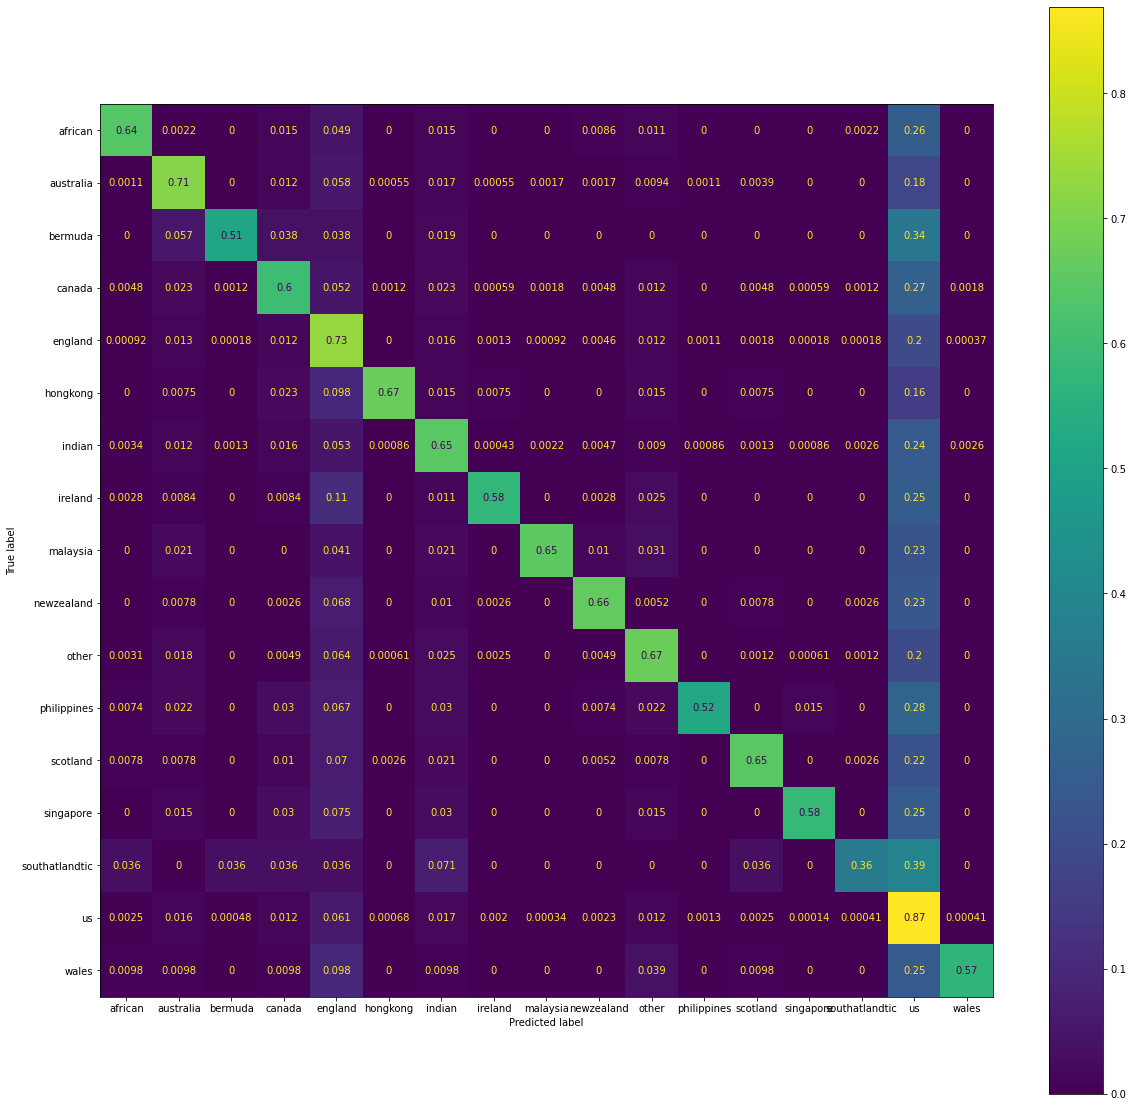

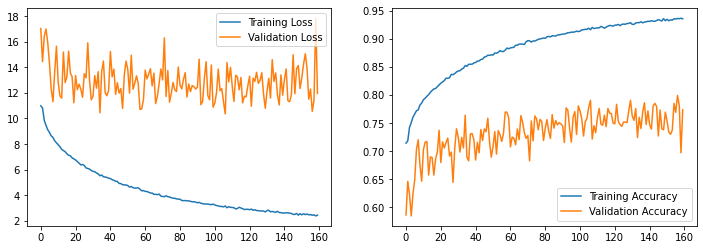

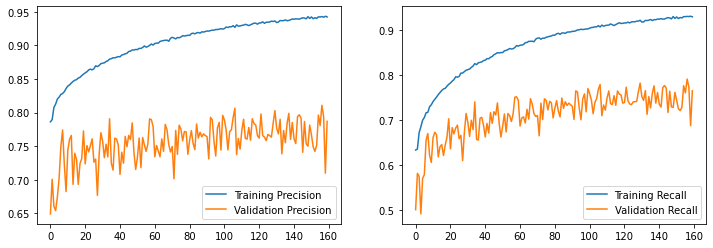

In [64]:
test_scores = ann_model3.evaluate(X_test, y_test)

prediction = ann_model3.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)

## Fourth ANN Model

In [10]:
# Define the keras model
ann_model4 = keras.models.Sequential()
ann_model4.add(Dense(64, input_dim=45, activation='relu'))

ann_model4.add(Dense(128, activation='relu'))
ann_model4.add(Dense(256, activation='relu'))
ann_model4.add(BatchNormalization())
ann_model4.add(Activation('relu'))
ann_model4.add(Dropout(0.2))

ann_model4.add(Dense(512, activation='relu'))
ann_model4.add(Dense(1024, activation='relu'))
ann_model4.add(BatchNormalization())
ann_model4.add(Activation('relu'))
ann_model4.add(Dropout(0.2))

ann_model4.add(Dense(512, activation='relu'))
ann_model4.add(Dense(256, activation='relu'))
ann_model4.add(BatchNormalization())
ann_model4.add(Activation('relu'))
ann_model4.add(Dropout(0.2))

ann_model4.add(Dense(128, activation='relu'))
ann_model4.add(Dense(64, activation='relu'))
ann_model4.add(BatchNormalization())
ann_model4.add(Activation('relu'))
ann_model4.add(Dropout(0.2))

ann_model4.add(Dense(32, activation='relu'))
ann_model4.add(Dense(17, activation='softmax', name='output'))

print(ann_model4.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2944      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1

In [11]:
ann_model4.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   loss_weights=class_weights,
                   metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

In [12]:
history = ann_model4.fit(X_train, y_train, epochs=160, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/160
175/175 [==============================] - 10s 49ms/step - loss: 28.5235 - accuracy: 0.4328 - precision: 0.4693 - recall: 0.0999 - val_loss: 26.7130 - val_accuracy: 0.4401 - val_precision: 0.4848 - val_recall: 0.0317
Epoch 2/160
175/175 [==============================] - 7s 41ms/step - loss: 22.1551 - accuracy: 0.4864 - precision: 0.5095 - recall: 0.1761 - val_loss: 22.0736 - val_accuracy: 0.4859 - val_precision: 0.5036 - val_recall: 0.0766
Epoch 3/160
175/175 [==============================] - 7s 39ms/step - loss: 21.8350 - accuracy: 0.4872 - precision: 0.5167 - recall: 0.1901 - val_loss: 26.1468 - val_accuracy: 0.4812 - val_precision: 0.4167 - val_recall: 1.6802e-04
Epoch 4/160
175/175 [==============================] - 6s 34ms/step - loss: 21.5096 - accuracy: 0.4894 - precision: 0.5319 - recall: 0.1886 - val_loss: 21.6420 - val_accuracy: 0.4861 - val_precision: 0.5352 - val_recall: 0.1522
Epoch 5/160
175/175 [==============================] - 6s 34ms/step - loss: 21.3410

930/930 [==============================] - 2s 2ms/step - loss: 12.5449 - accuracy: 0.7304 - precision: 0.7552 - recall: 0.7105
Classification Report

              precision    recall  f1-score   support

           0       0.82      0.55      0.66       465
           1       0.72      0.59      0.65      1817
           2       0.73      0.45      0.56        53
           3       0.59      0.55      0.57      1682
           4       0.76      0.61      0.68      5455
           5       0.76      0.56      0.65       133
           6       0.71      0.60      0.65      2323
           7       0.71      0.48      0.58       357
           8       0.74      0.54      0.62        97
           9       0.61      0.58      0.60       384
          10       0.76      0.62      0.68      1632
          11       0.59      0.39      0.47       135
          12       0.80      0.53      0.64       386
          13       0.81      0.37      0.51        67
          14       0.67      0.14      

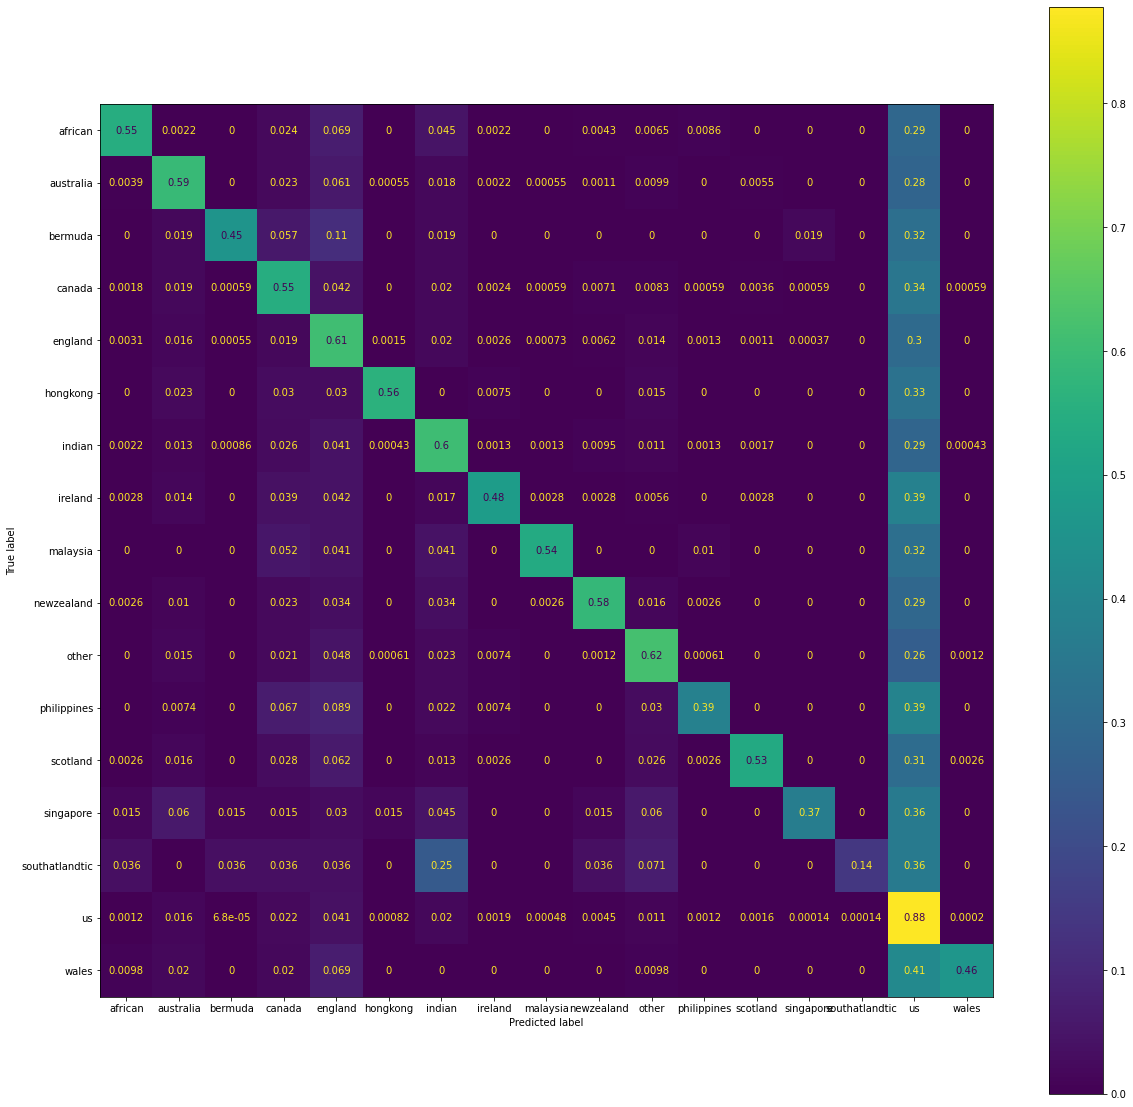

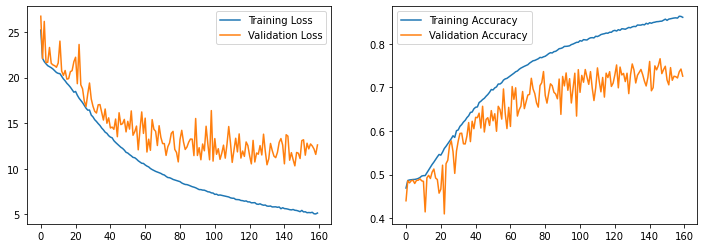

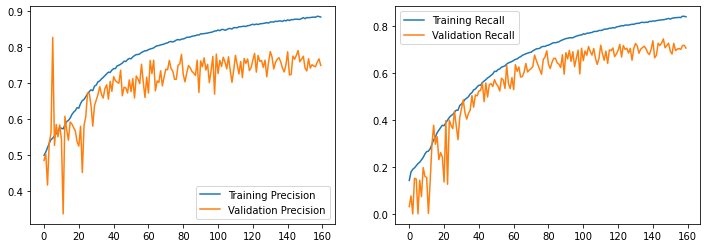

In [13]:
test_scores = ann_model4.evaluate(X_test, y_test)

prediction = ann_model4.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)

## Fifth Model

In [10]:
# Define the keras model
ann_model5 = keras.models.Sequential()
ann_model5.add(Dense(64, input_dim=45, activation='relu'))

ann_model5.add(Dense(128, activation='relu'))
ann_model5.add(Dense(256, activation='relu'))
ann_model5.add(BatchNormalization())
ann_model5.add(Activation('relu'))
ann_model5.add(Dropout(0.2))

ann_model5.add(Dense(512, activation='relu'))
ann_model5.add(Dense(1024, activation='relu'))
ann_model5.add(BatchNormalization())
ann_model5.add(Activation('relu'))
ann_model5.add(Dropout(0.2))

ann_model5.add(Dense(2048, activation='relu'))
ann_model5.add(Dense(1024, activation='relu'))
ann_model5.add(BatchNormalization())
ann_model5.add(Activation('relu'))
ann_model5.add(Dropout(0.2))

ann_model5.add(Dense(512, activation='relu'))
ann_model5.add(Dense(256, activation='relu'))
ann_model5.add(BatchNormalization())
ann_model5.add(Activation('relu'))
ann_model5.add(Dropout(0.2))

ann_model5.add(Dense(128, activation='relu'))
ann_model5.add(Dense(64, activation='relu'))
ann_model5.add(BatchNormalization())
ann_model5.add(Activation('relu'))
ann_model5.add(Dropout(0.2))

ann_model5.add(Dense(32, activation='relu'))
ann_model5.add(Dense(17, activation='softmax', name='output'))

print(ann_model5.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2944      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1

In [11]:
ann_model5.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   loss_weights=class_weights,
                   metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

In [12]:
history = ann_model5.fit(X_train, y_train, epochs=160, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/160
175/175 [==============================] - 20s 106ms/step - loss: 29.5042 - accuracy: 0.3616 - precision: 0.4182 - recall: 0.0776 - val_loss: 24.3959 - val_accuracy: 0.4830 - val_precision: 0.5054 - val_recall: 0.1110
Epoch 2/160
175/175 [==============================] - 16s 91ms/step - loss: 22.2268 - accuracy: 0.4898 - precision: 0.5093 - recall: 0.1860 - val_loss: 22.0454 - val_accuracy: 0.4864 - val_precision: 0.4929 - val_recall: 0.0186
Epoch 3/160
175/175 [==============================] - 16s 89ms/step - loss: 21.9509 - accuracy: 0.4870 - precision: 0.5072 - recall: 0.1774 - val_loss: 21.5530 - val_accuracy: 0.4859 - val_precision: 0.5653 - val_recall: 0.0761
Epoch 4/160
175/175 [==============================] - 15s 88ms/step - loss: 21.5711 - accuracy: 0.4916 - precision: 0.5190 - recall: 0.1929 - val_loss: 21.4859 - val_accuracy: 0.4875 - val_precision: 0.5242 - val_recall: 0.1077
Epoch 5/160
175/175 [==============================] - 15s 87ms/step - loss: 21.523

930/930 [==============================] - 4s 5ms/step - loss: 16.5964 - accuracy: 0.6980 - precision: 0.7101 - recall: 0.6872
Classification Report

              precision    recall  f1-score   support

           0       0.60      0.42      0.49       465
           1       0.69      0.56      0.62      1817
           2       0.51      0.36      0.42        53
           3       0.61      0.46      0.52      1682
           4       0.68      0.62      0.65      5455
           5       0.80      0.46      0.58       133
           6       0.73      0.50      0.59      2323
           7       0.61      0.46      0.53       357
           8       0.68      0.47      0.56        97
           9       0.68      0.49      0.57       384
          10       0.69      0.57      0.62      1632
          11       0.57      0.30      0.40       135
          12       0.61      0.56      0.58       386
          13       0.69      0.27      0.39        67
          14       0.48      0.36      

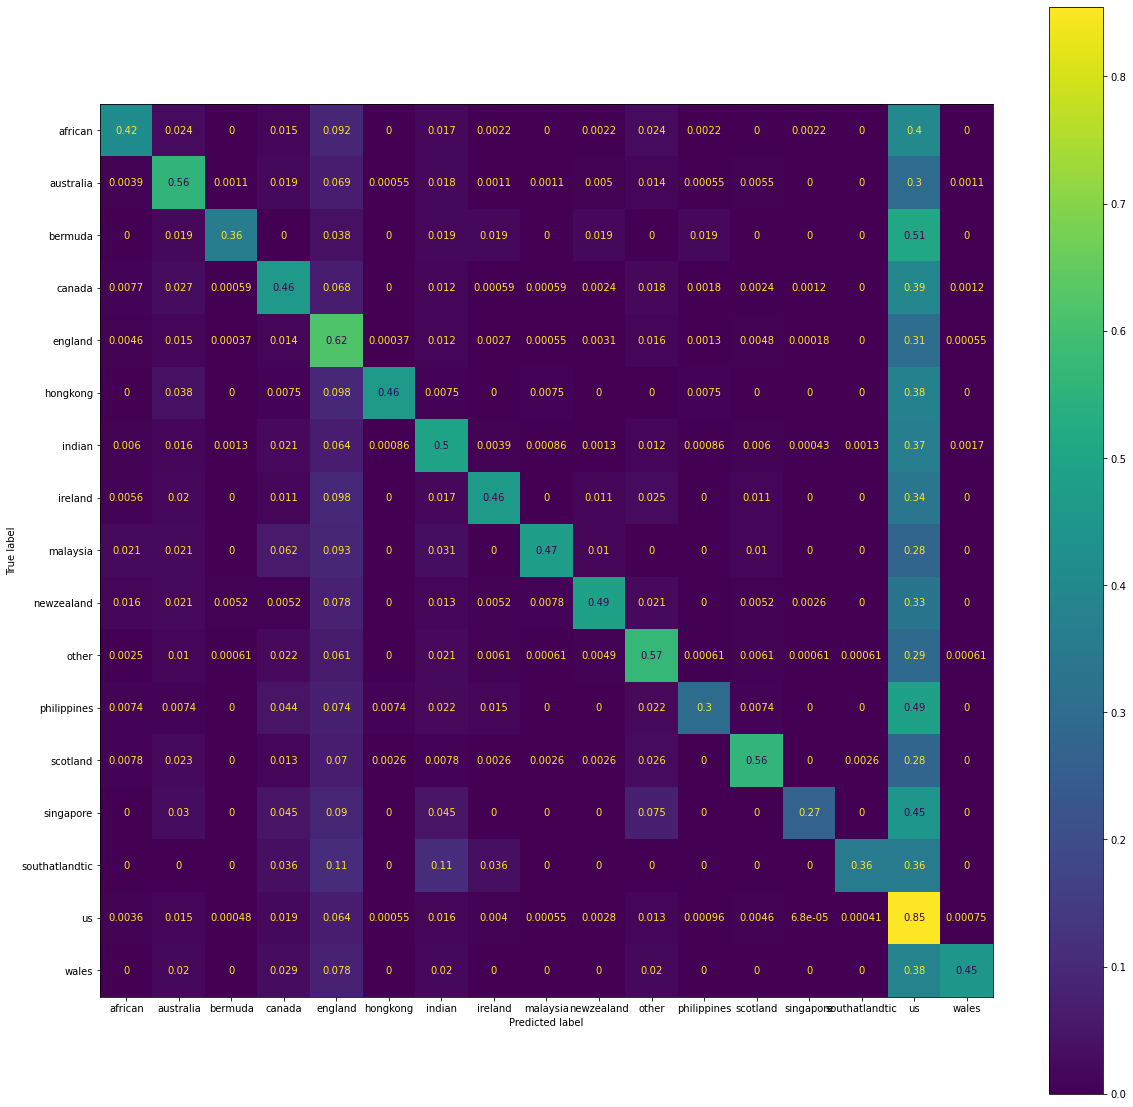

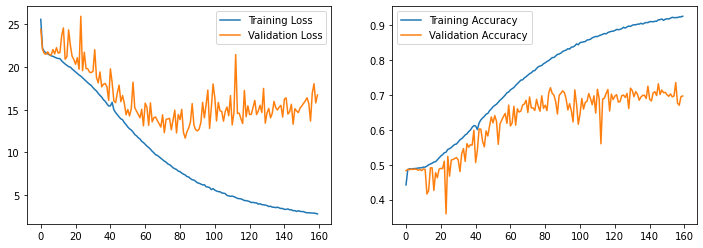

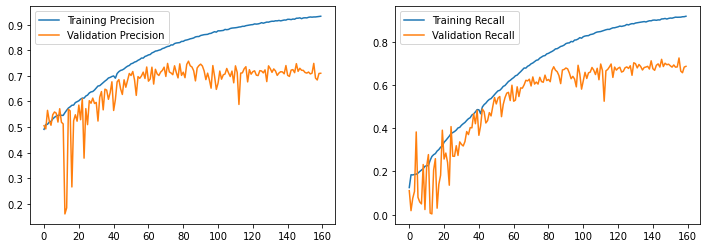

In [13]:
test_scores = ann_model5.evaluate(X_test, y_test)

prediction = ann_model5.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)